# CHAPTER 3 선형회귀분석을 이용한 데이터 분석

## 3.1 단일선형회귀분석

### 3.1.5 단일선형회귀분석 실습 - Basic 1

In [1]:
# scikit learn 패키지에서 linear_model이라는 모듈을 불러들임
from sklearn import linear_model
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# matplotlib에는 사전에 정의한 많은 스타일이 있다.
# ggplot도 그 중 하나임
# R에서 사용하는 ggplot을 흉내내는 스타일을 사용하겠다고 선언

matplotlib.style.use('ggplot')

In [2]:
# 2차원 배열을 만들어 'data'라는 변수에 할당
data = {'x' : [13, 19, 16, 14, 15, 14],
        'y' : [40, 83, 62, 48, 58, 43]}

# data라는 변수의 값을 data frame 형태로 변환
data = pd.DataFrame(data)
data

,x,y
0,13,40
1,19,83
2,16,62
3,14,48
4,15,58
5,14,43


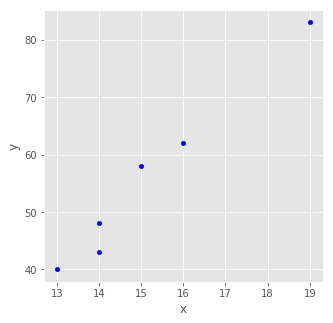

In [3]:
data.plot(kind="scatter",  # 산점도를 그리시오
          x='x',           # 가로축은 x라고 라벨을 붙임
          y='y',           # 세로축은 y라고 라벨을 붙임
          figsize=(5,5),   # 가로 5인치, 세로 5인치 크기의 박스를 설정
          color="blue")    # 산점도 상의 점 색상을 파랑색으로 지정

In [4]:
# linear_model 모듈이 포함하고 있는 Linearregression() 함수를 'linear_regression'이라고 하는 변수에 할당
linear_regression = linear_model.LinearRegression()

# Linearregression()의 fit()이라는 함수를 이용하여 선형회귀 모델 훈련 실행
# 이 때 독립변수는 x, 종속변수는 y
linear_regression.fit(X = pd.DataFrame(data["x"]), y = data["y"])

# 선형 회귀식의 세로축 절편 'linear_regression.intercept_'를 구하여 출력한다.
print('a value = ', linear_regression.intercept_)

# 선형 회귀식의 기울기 'linear_regression.coef_'를 구하여 출력한다.
print('b balue =', linear_regression.coef_)

a value =  -55.48175182481753
b balue = [7.32846715]


In [5]:
# 위에서 만들어진 선형회귀 모델을 적용하여 선형회귀 값을 구해본다.
# 그 값을 prediction에 할당한다.
prediction = linear_regression.predict(X = pd.DataFrame(data["x"]))

# 실제 y값과 예측한 y값을 비교하여 잔차(residuals)를 구한다.
residuals = data["y"] - prediction
print(residuals)

# 변수의 갯수(6개), 잔차의 평균값, 잔차의 표준편차, 최소값, 25% 값, 50% 값, 75% 값, 최대값을 출력한다.
residuals.describe()

0    0.211679
1   -0.759124
2    0.226277
3    0.883212
4    3.554745
5   -4.116788
Name: y, dtype: float64


count    6.000000e+00
mean     5.921189e-15
std      2.491445e+00
min     -4.116788e+00
25%     -5.164234e-01
50%      2.189781e-01
75%      7.189781e-01
max      3.554745e+00
Name: y, dtype: float64

In [6]:
# 잔차를 제곱하여 전체를 합침. 결과값을 SSE라는 변수에 할당
SSE = (residuals**2).sum()
print("SSE = ", SSE)

# y값의 표준편차를 제곱한 것을 모두 합침. 그 결과값을 SST라는 변수에 할당
SST = ((data["y"]-data["y"].mean())**2).sum()
print("SST = ", SST)

# 결정계수 R을 구함
R_squared = 1 - (SSE/SST)
print('R_squared = ', R_squared)

SSE =  31.03649635036502
SST =  1257.3333333333333
R_squared =  0.9753156179610034


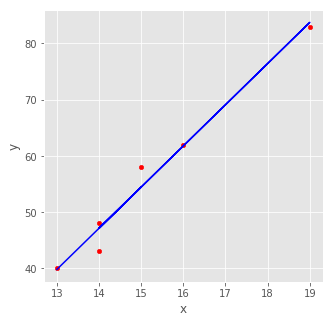

In [7]:
data.plot(kind="scatter",x="x",y="y",figsize=(5,5),color="red")

# Plot regression line
plt.plot(data["x"],prediction,color="blue")

In [8]:
# sklearn.metrics라는 패키지로부터 mean_squared_error 모듈을 불러들임
from sklearn.metrics import mean_squared_error

# 결정계수 R값을 구함
print('score = ', linear_regression.score(X = pd.DataFrame(data["x"]), y = data["y"]))

# 실제값(data[y])과 회귀식 값(prediction)의 차이의 제곱을 구함
print('Mean_Squared_Error = ', mean_squared_error(prediction, data['y']))

# Mean squared error의 제곱근 값을 구함
print('RMSE = ', mean_squared_error(prediction, data['y'])**0.5)

score =  0.9753156179610034
Mean_Squared_Error =  5.172749391727503
RMSE =  2.2743679103714736


### 3.1.6  단일선형회귀분석 실습 - Basic 2

In [9]:
from sklearn import datasets
boston_house_prices = datasets.load_boston()
print(boston_house_prices.keys())
print(boston_house_prices.data.shape)
print(boston_house_prices.feature_names)

dict_keys(['data', 'target', 'feature_names', 'DESCR'])
(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [10]:
print(boston_house_prices.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [11]:
data_frame = pd.DataFrame(boston_house_prices.data)
data_frame.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88


In [12]:
data_frame.columns = boston_house_prices.feature_names
data_frame.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88


In [13]:
data_frame['Price'] = boston_house_prices.target
data_frame.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


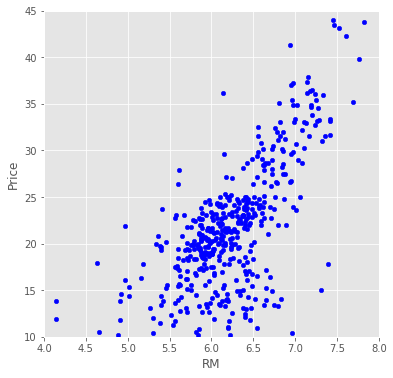

In [14]:
data_frame.plot(kind="scatter", x="RM", y="Price", figsize=(6,6),
                color="blue", xlim = (4,8), ylim = (10,45))

In [15]:
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X = pd.DataFrame(data_frame["RM"]), y = data_frame["Price"])
prediction = linear_regression.predict(X = pd.DataFrame(data_frame["RM"]))
print('a value = ', linear_regression.intercept_)
print('b balue =', linear_regression.coef_)

a value =  -34.67062077643857
b balue = [9.10210898]


In [16]:
residuals = data_frame["Price"] - prediction
residuals.describe()

count    5.060000e+02
mean     1.899227e-15
std      6.609606e+00
min     -2.334590e+01
25%     -2.547477e+00
50%      8.976267e-02
75%      2.985532e+00
max      3.943314e+01
Name: Price, dtype: float64

In [17]:
SSE = (residuals**2).sum()
SST = ((data_frame["Price"]-data_frame["Price"].mean())**2).sum()
R_squared = 1 - (SSE/SST)
print('R_squared = ', R_squared)

R_squared =  0.4835254559913341


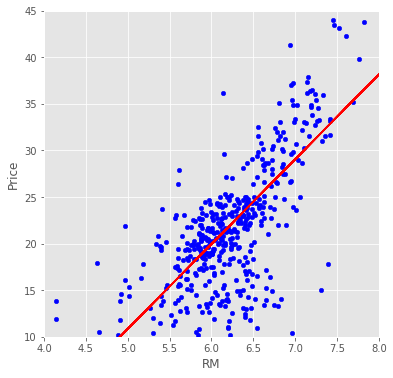

In [18]:
data_frame.plot(kind="scatter",x="RM",y="Price",figsize=(6,6),
                color="blue", xlim = (4,8), ylim = (10,45))

# Plot regression line
plt.plot(data_frame["RM"],prediction,color="red")

In [19]:
print('score = ', linear_regression.score(X = pd.DataFrame(data_frame["RM"]), y = data_frame["Price"]))
print('Mean_Squared_Error = ', mean_squared_error(prediction, data_frame["Price"]))
print('RMSE = ', mean_squared_error(prediction, data_frame["Price"])**0.5)

score =  0.4835254559913343
Mean_Squared_Error =  43.60055177116956
RMSE =  6.603071389222561
